# Import defualt neccessary package

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
# preprocessing
data = pd.read_csv('../data/right_foot_data.csv')
data = data.drop(['order'], axis=1) 
data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height
0,Normal,23.619,19.814,8.203,17.205,14.817,9.207,5.307,9.907,3.00
1,Normal,25.912,21.489,8.978,19.063,16.265,10.235,6.387,10.745,3.60
2,High,22.878,19.112,7.178,16.500,14.470,9.033,5.449,9.556,3.45
3,Normal,23.869,20.263,7.533,17.034,15.272,8.994,5.712,10.132,3.47
4,High,21.408,18.132,6.966,15.709,14.181,8.746,5.317,9.066,3.35
5,Flat,23.761,20.450,7.762,17.566,15.567,9.674,5.450,10.225,3.38
6,Flat,22.515,19.252,7.469,16.726,14.762,8.674,4.909,9.626,2.92
7,Flat,22.549,18.885,7.525,15.955,14.294,9.286,5.275,9.443,2.70
8,High,25.197,21.030,8.789,18.409,15.540,10.004,6.079,10.515,3.44
9,High,22.109,18.738,7.447,16.407,14.316,10.065,5.157,9.369,3.53


In [30]:
# Encode label type
clean_up = {'foot_type':{'Normal': 0, 'Flat': 1, 'High': 2}}
encoded_data = data.replace(clean_up)
encoded_data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height
0,0,23.619,19.814,8.203,17.205,14.817,9.207,5.307,9.907,3.00
1,0,25.912,21.489,8.978,19.063,16.265,10.235,6.387,10.745,3.60
2,2,22.878,19.112,7.178,16.500,14.470,9.033,5.449,9.556,3.45
3,0,23.869,20.263,7.533,17.034,15.272,8.994,5.712,10.132,3.47
4,2,21.408,18.132,6.966,15.709,14.181,8.746,5.317,9.066,3.35
5,1,23.761,20.450,7.762,17.566,15.567,9.674,5.450,10.225,3.38
6,1,22.515,19.252,7.469,16.726,14.762,8.674,4.909,9.626,2.92
7,1,22.549,18.885,7.525,15.955,14.294,9.286,5.275,9.443,2.70
8,2,25.197,21.030,8.789,18.409,15.540,10.004,6.079,10.515,3.44
9,2,22.109,18.738,7.447,16.407,14.316,10.065,5.157,9.369,3.53


In [31]:
# Calculate SI & CSI
encoded_data['SI'] = data['middle_foot_width']/data['heel_width']
encoded_data['CSI'] = data['middle_foot_width']/data['apex1_to_apex5']
encoded_data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height,SI,CSI
0,0,23.619,19.814,8.203,17.205,14.817,9.207,5.307,9.907,3.00,1.545694,0.890953
1,0,25.912,21.489,8.978,19.063,16.265,10.235,6.387,10.745,3.60,1.405668,0.877186
2,2,22.878,19.112,7.178,16.500,14.470,9.033,5.449,9.556,3.45,1.317306,0.794642
3,0,23.869,20.263,7.533,17.034,15.272,8.994,5.712,10.132,3.47,1.318803,0.837558
4,2,21.408,18.132,6.966,15.709,14.181,8.746,5.317,9.066,3.35,1.310137,0.796478
5,1,23.761,20.450,7.762,17.566,15.567,9.674,5.450,10.225,3.38,1.424220,0.802357
6,1,22.515,19.252,7.469,16.726,14.762,8.674,4.909,9.626,2.92,1.521491,0.861079
7,1,22.549,18.885,7.525,15.955,14.294,9.286,5.275,9.443,2.70,1.426540,0.810360
8,2,25.197,21.030,8.789,18.409,15.540,10.004,6.079,10.515,3.44,1.445797,0.878549
9,2,22.109,18.738,7.447,16.407,14.316,10.065,5.157,9.369,3.53,1.444057,0.739891


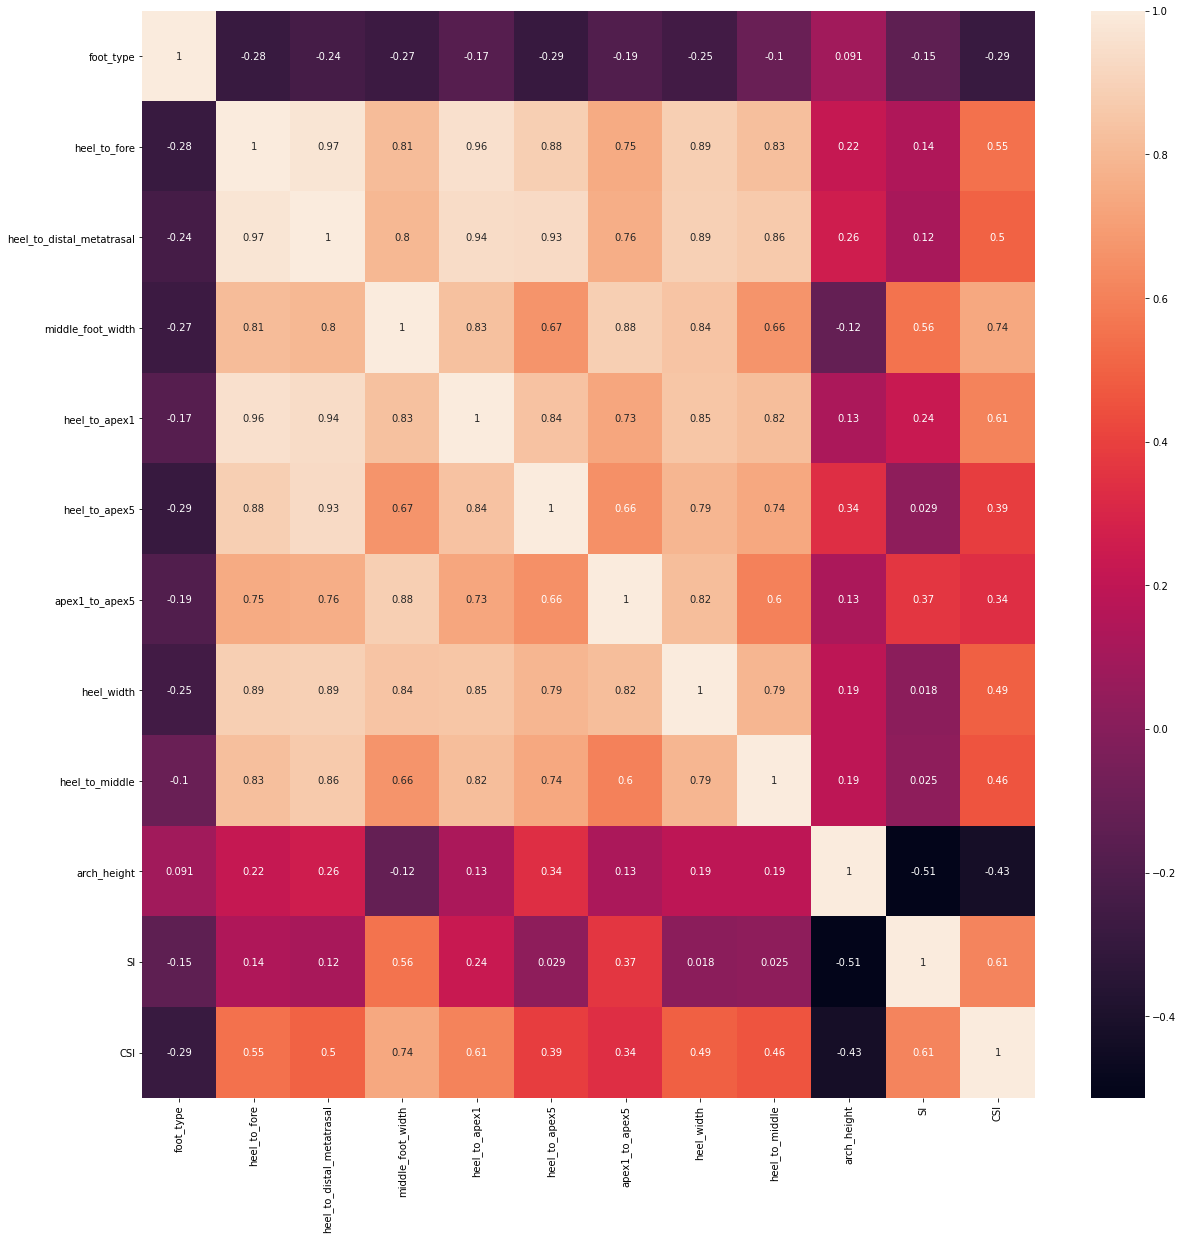

In [32]:
corrmat = encoded_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(encoded_data[top_corr_features].corr(),annot=True)

In [33]:
# Select only features that have correlation with arch height more tham 0.26 
selected_feature = ['heel_to_distal_metatrasal', 'heel_to_apex5', 'heel_width', 'heel_to_middle', 'SI', 'CSI']
features = encoded_data[selected_feature]
target = encoded_data[['arch_height']]

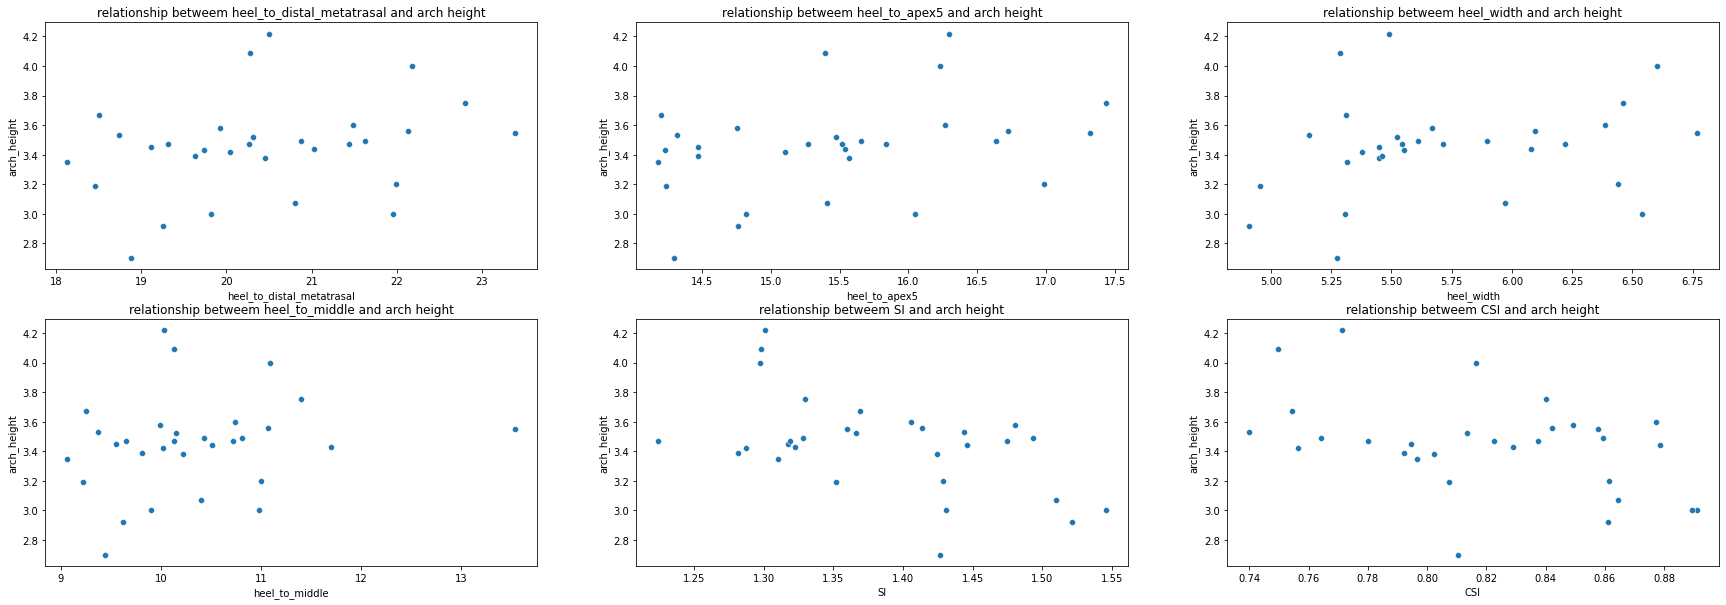

In [34]:
# Check data trend
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(30, 10))
column = 0
row = 0
for feature in selected_feature:
    sns.scatterplot(data=encoded_data, x=feature, y="arch_height", ax=axes[row][column])
    axes[row][column].set_title((
    f'relationship betweem {feature} and arch height'
    ))
    column += 1
    if(column == 3):
        row = 1
        column = 0
# sns.scatterplot(data=tips, x="total_bill", y="tip")

### Summary
All relationships is almost linear relationship, so we should not use polynomial regression on this dataset.

In [35]:
# Split train and test
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=42)

In [36]:
features

,heel_to_distal_metatrasal,heel_to_apex5,heel_width,heel_to_middle,SI,CSI
0,19.814,14.817,5.307,9.907,1.545694,0.890953
1,21.489,16.265,6.387,10.745,1.405668,0.877186
2,19.112,14.470,5.449,9.556,1.317306,0.794642
3,20.263,15.272,5.712,10.132,1.318803,0.837558
4,18.132,14.181,5.317,9.066,1.310137,0.796478
5,20.450,15.567,5.450,10.225,1.424220,0.802357
6,19.252,14.762,4.909,9.626,1.521491,0.861079
7,18.885,14.294,5.275,9.443,1.426540,0.810360
8,21.030,15.540,6.079,10.515,1.445797,0.878549
9,18.738,14.316,5.157,9.369,1.444057,0.739891


# Model selection
- linear regression
- Polynomial regression
- Decision tree regression
- Elasticnet regression
- NeuralNetwork Regression
- Lasso regression
- Ridge regression
- SVM

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear regression

Mean Absolute Error: 0.2214936242605091
Mean Square Error: 0.05875781949579828
r2 score: -0.016571271553604383


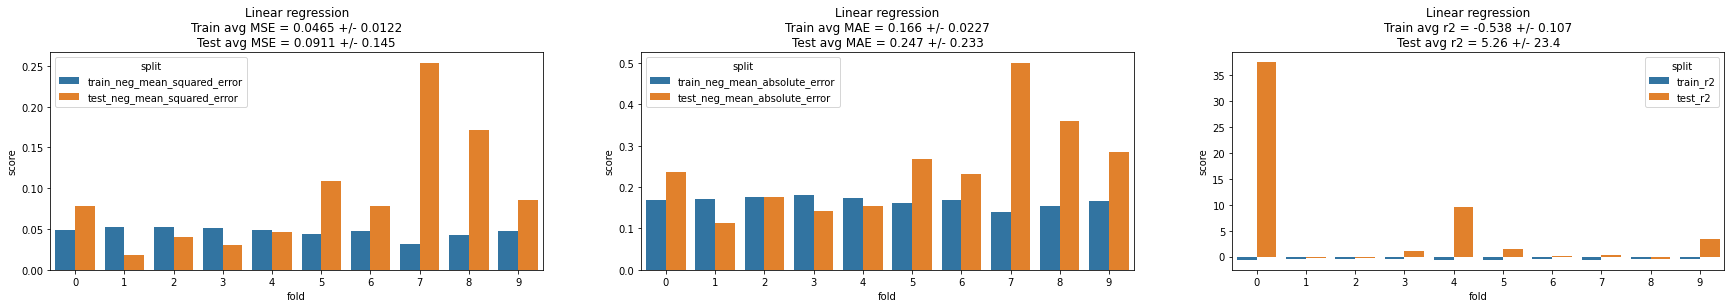

In [38]:
from sklearn.linear_model import LinearRegression
# Linear Regression
model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    LinearRegression())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Linear regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Linear regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Linear regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Polynomial regrssion

Mean Absolute Error: 2.486925506563011
Mean Square Error: 7.901717518101601
r2 score: -135.7079155380901


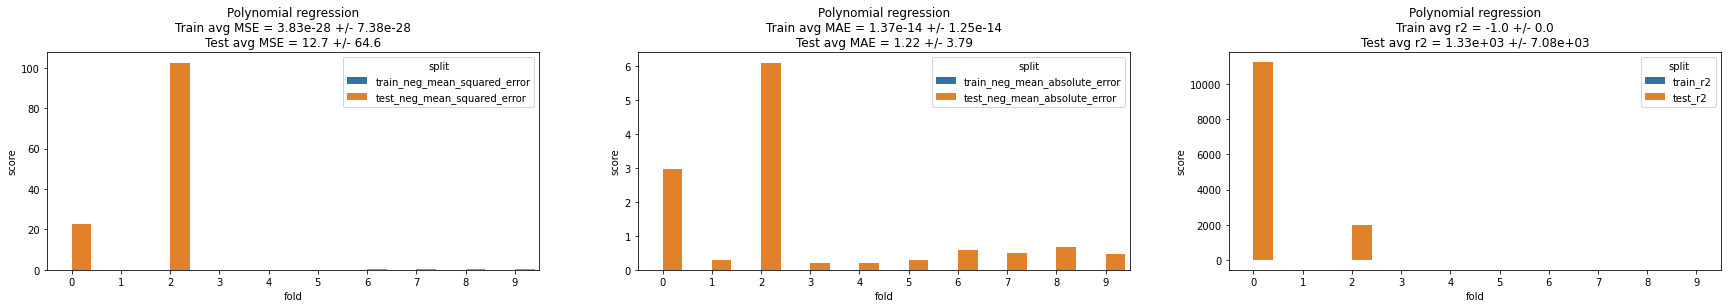

In [39]:
from sklearn.linear_model import LinearRegression
# Linear Regression
model = make_pipeline(
    PolynomialFeatures(degree=4),
    preprocessing.StandardScaler(),
    LinearRegression())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Polynomial regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Polynomial regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Polynomial regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Decision tree regression

Mean Absolute Error: 0.3466666666666667
Mean Square Error: 0.17313333333333344
r2 score: -1.9953863898500623


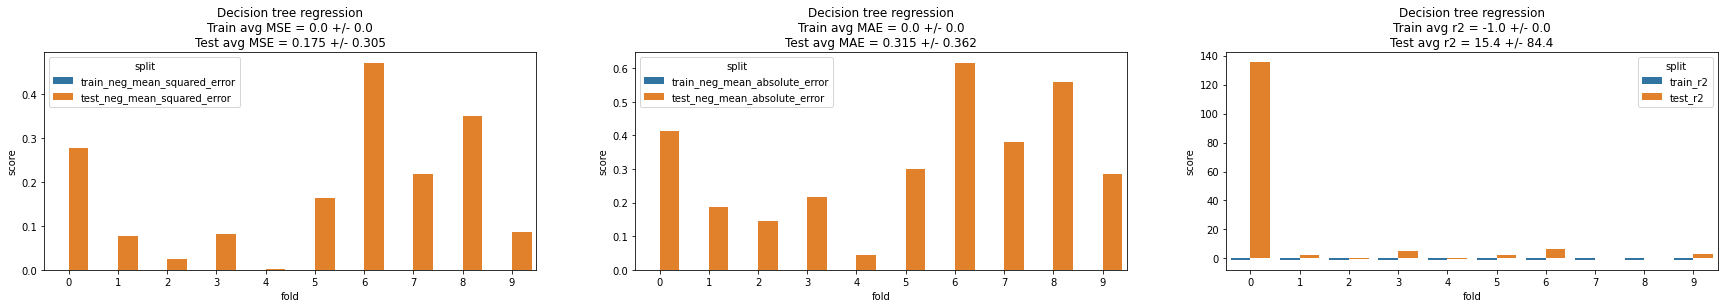

In [40]:
from sklearn.tree import DecisionTreeRegressor

model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    DecisionTreeRegressor())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Decision tree regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Decision tree regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Decision tree regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# ElasticNet regression

Mean Absolute Error: 0.23703703703703694
Mean Square Error: 0.11398655692729757
r2 score: -0.9720857599878492


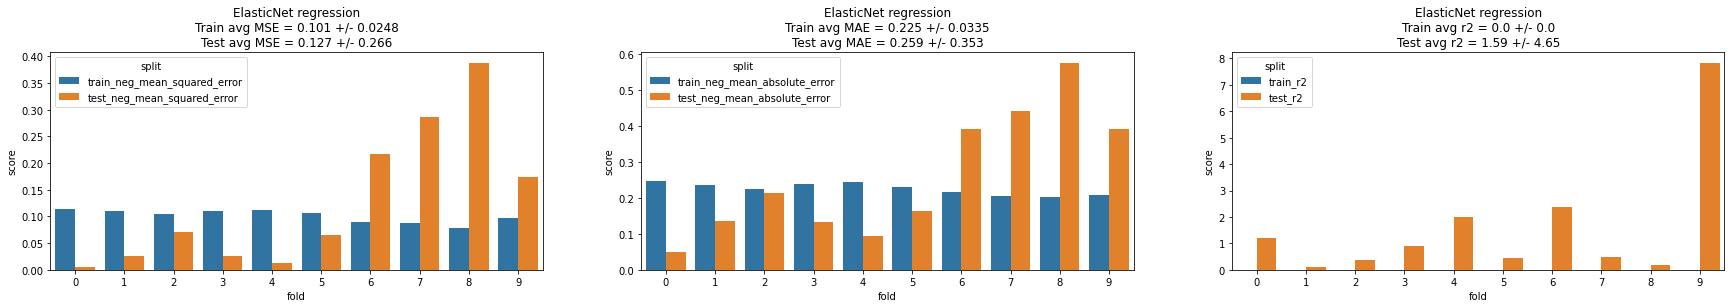

In [41]:
from sklearn.linear_model import ElasticNet

model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    ElasticNet())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'ElasticNet regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'ElasticNet regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'ElasticNet regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# NeuralNetwork Regression

Mean Absolute Error: 0.7952566290886529
Mean Square Error: 0.9080714961666473
r2 score: -14.71057951845412


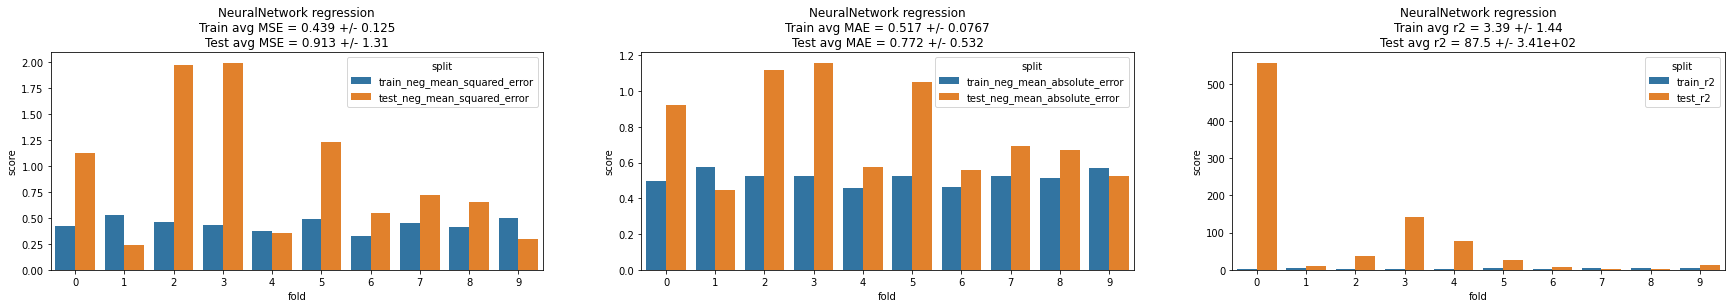

In [42]:
from sklearn.neural_network import MLPRegressor

model = make_pipeline(
    preprocessing.StandardScaler(),
    MLPRegressor())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'NeuralNetwork regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'NeuralNetwork regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'NeuralNetwork regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Lasso regression

Mean Absolute Error: 0.23703703703703694
Mean Square Error: 0.11398655692729757
r2 score: -0.9720857599878492


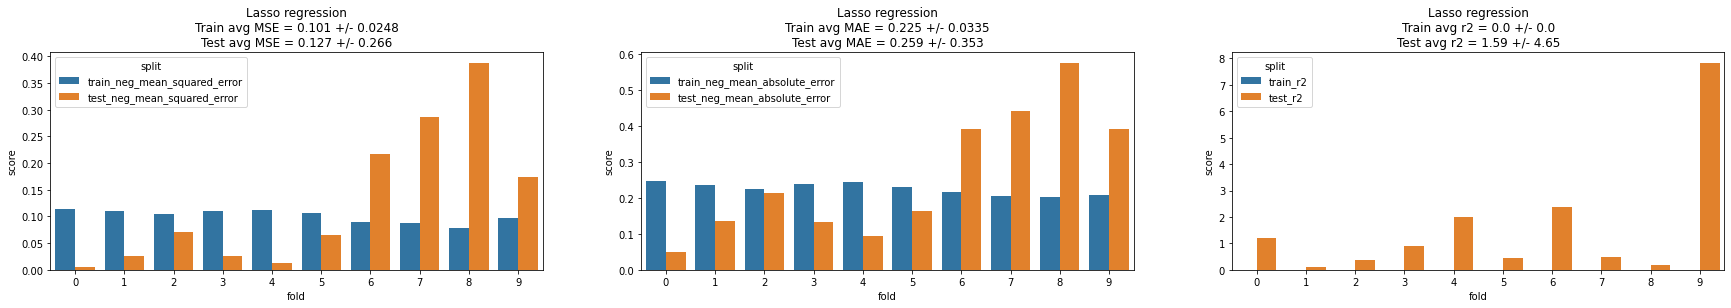

In [43]:
from sklearn.linear_model import Lasso

model = make_pipeline(
    preprocessing.StandardScaler(),
    Lasso())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Lasso regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Lasso regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Lasso regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Ridge regression

Mean Absolute Error: 0.22395104733499963
Mean Square Error: 0.058908128852119636
r2 score: -0.01917177944843762


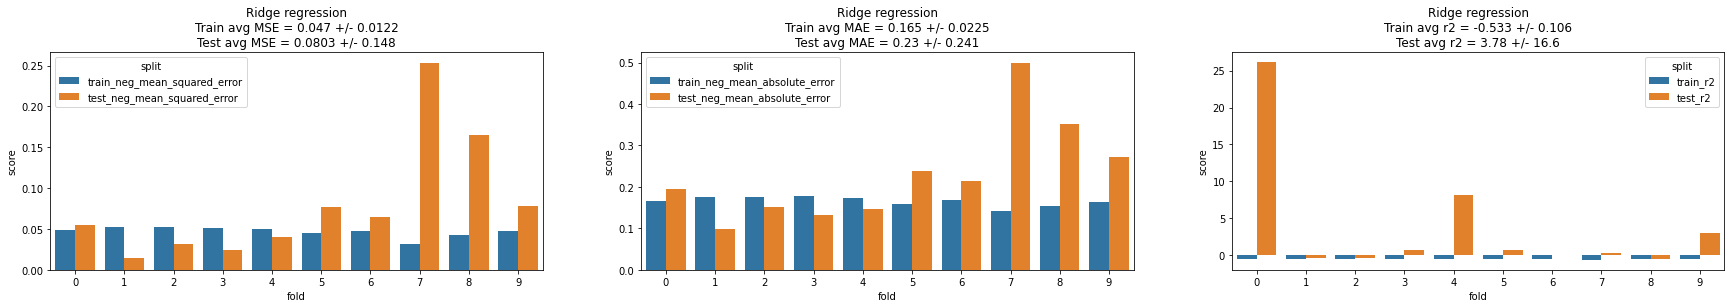

In [44]:
from sklearn.linear_model import Ridge

model = make_pipeline(
    preprocessing.StandardScaler(),
    Ridge())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Ridge regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Ridge regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Ridge regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# SVR

Mean Absolute Error: 0.32023639913120244
Mean Square Error: 0.11032307340149505
r2 score: -0.9087036920673903


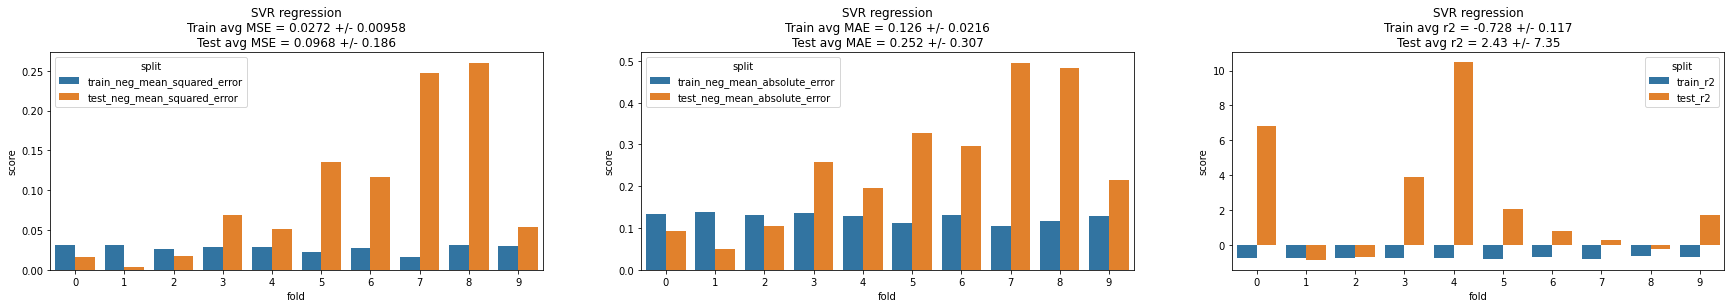

In [45]:
from sklearn.svm import SVR

model = make_pipeline(
    preprocessing.StandardScaler(),
    SVR())
scores = cross_validate(
    model, features_train, target_train, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'SVR regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'SVR regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'SVR regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features_train, target_train)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Score table for left foot for 10-fold cross validation
## Train
| model\average score | MSE | MAE | R2 |
| :--- | :----: | :----: | :----: |
| Linear regression | 0.026 +/- 0.00435 | 0.135 +/- 0.0139 | -0.74 +/- 0.0533 |
| Polynomial regression | 8.39e-28 +/- 1.66e-27 | 1.91e-14 +/- 2.25e-14 | -1.0 +/- 0.0 |
| Dicision tree regression | 0.0 +/- 0.0 | 0.0 +/- 0.0 | -1.0 +/- 0.0 |
| ElasticNet regression | 0.101 +/- 0.0254 | 0.225 +/- 0.0318 | 0.0 +/- 0.0 |
| NeuralNetwork regression | 0.462 +/- 0.252 | 0.531 +/- 0.15 | 3.73 +/- 3.26 |
| Lasso regression | 0.101 +/- 0.0254 | 0.225 +/- 0.0318 | 0.0 +/- 0.0 |
| Ridge regression | 0.0264 +/- 0.00456 | 0.136 +/- 0.0155 | -0.735 +/- 0.0544 |
| SVM regression(SVR) | 0.0158 +/- 0.00354 | 0.111 +/- 0.0135 | -0.841 +/- 0.0479 |

## Test
| model\average score | MAE | MSE | R2 |
| :--- | :----: | :----: | :----: |
| Linear regression | 0.0554 +/- 0.0632 | 0.204 +/- 0.13 | 12.1 +/- 47.9 |
| Polynomial regression | 1.47 +/- 4.19 | 0.869 +/- 1.25 | 9.08e+02 +/- 5.26e+03 |
| Dicision tree regression | 0.122 +/- 0.217 | 0.249 +/- 0.238 | 56.9.0 +/- 2.55e+02 |
| ElasticNet regression | 0.124 +/- 0.269 | 0.256 +/- 0.344 | 5.83 +/- 23.9 |
| NeuralNetwork regression | 0.841 +/- 1.04 | 0.753 +/- 0.625 | 3.86e+02 +/- 1.81e03 |
| Lasso regression | 0.124 +/- 0.269 | 0.256 +/- 0.344 | 5.83 +/- 23.9 |
| Ridge regression | 0.0474 +/- 0.0675 | 0.185 +/- 0.151 | 7.0 +/- 36.7 |
| SVM regression(SVR) | 0.0842 +/- 0.155 | 0.238 +/- 0.228 | 9.21 +/- 38.4 |

## Summary

By the result of those algorithm, the best algorithm is Ridge regression. For the reason, ridge regression algorithm gave a result, which have low mean squreed error and low mean absolute error. Moreover, its graph demonstrate us, that the result is not overfiting. 

# Train by using all data

Mean Absolute Error: 0.2105554798122542
Mean Square Error: 0.05150109910069808
r2 score: 0.1089775242093749


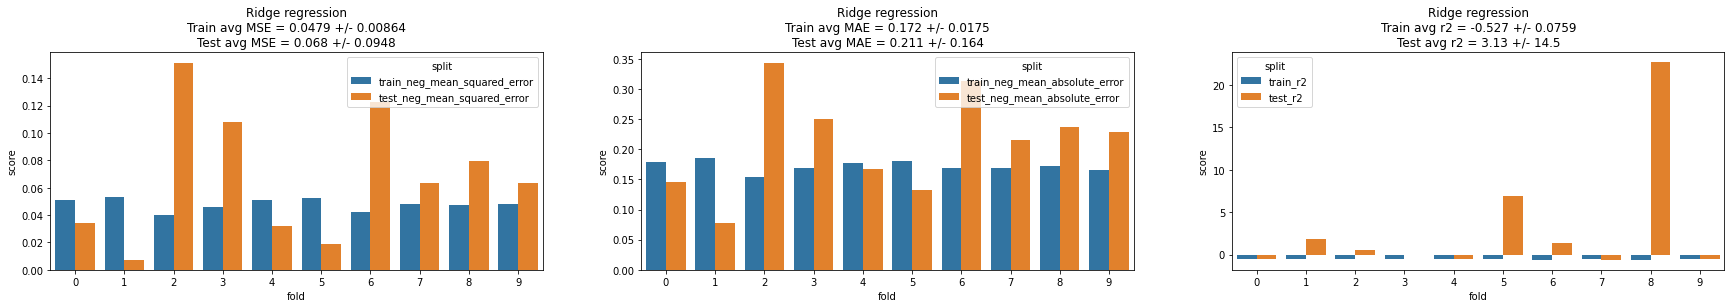

In [46]:

model = make_pipeline(
    preprocessing.StandardScaler(),
    Ridge())
scores = cross_validate(
    model, features, target, cv=10, 
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True)
a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_neg_mean_squared_error'] = a['test_neg_mean_squared_error'] * -1
a['train_neg_mean_squared_error'] = a['train_neg_mean_squared_error'] * -1
a['test_neg_mean_absolute_error'] = a['test_neg_mean_absolute_error'] * -1
a['train_neg_mean_absolute_error'] = a['train_neg_mean_absolute_error'] * -1
a['test_r2'] = a['test_r2'] * -1
a['train_r2'] = a['train_r2'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=3, figsize=(30, 4))
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_squared_error', 'test_neg_mean_squared_error'], data=b, ax=axes[0])
axes[0].set_title((
    f'Ridge regression\n'
    f'Train avg MSE = {a["train_neg_mean_squared_error"].mean():.3} +/- {a["train_neg_mean_squared_error"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_neg_mean_squared_error"].mean():.3} +/- {a["test_neg_mean_squared_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_neg_mean_absolute_error', 'test_neg_mean_absolute_error'], data=b, ax=axes[1])
axes[1].set_title((
    f'Ridge regression\n'
    f'Train avg MAE = {a["train_neg_mean_absolute_error"].mean():.3} +/- {a["train_neg_mean_absolute_error"].std() * 2:.3}\n'
    f'Test avg MAE = {a["test_neg_mean_absolute_error"].mean():.3} +/- {a["test_neg_mean_absolute_error"].std() * 2:.3}'
    ))

sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_r2', 'test_r2'], data=b, ax=axes[2])
axes[2].set_title((
    f'Ridge regression\n'
    f'Train avg r2 = {a["train_r2"].mean():.3} +/- {a["train_r2"].std() * 2:.3}\n'
    f'Test avg r2 = {a["test_r2"].mean():.3} +/- {a["test_r2"].std() * 2:.3}'
    ))
regression = model.fit(features, target)
predict_result = regression.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

# Hyperparameter tuning

In [47]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

params_ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , 'normalize': [True, False], 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_model = Ridge()
tuned_model = HalvingGridSearchCV(ridge_model, params_ridge, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True).fit(features, target)
best_parameters = tuned_model.best_params_
best_score = tuned_model.best_score_
print('Best parameters:',best_parameters)

Best parameters: {'alpha': 1, 'fit_intercept': True, 'normalize': True, 'solver': 'saga'}


In [48]:
best_score

-0.07386545627579037

# Test tuned model

In [53]:
model = Ridge(**best_parameters).fit(features, target)
predict_result = model.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], predict_result))
print('r2 score:', r2_score(target_test['arch_height'], predict_result))

Mean Absolute Error: 0.19772899217023424
Mean Square Error: 0.05397125942598558
r2 score: 0.06624118640163257


# Save model

In [54]:
from joblib import dump, load
dump(model, 'right_foot_best_model.joblib') 

['right_foot_best_model.joblib']

In [55]:
clf = load('right_foot_best_model.joblib') 

In [56]:
try_predict_result = clf.predict(features_test)
print('Mean Absolute Error:', mean_absolute_error(target_test['arch_height'], try_predict_result))
print('Mean Square Error:', mean_squared_error(target_test['arch_height'], try_predict_result))
print('r2 score:', r2_score(target_test['arch_height'], try_predict_result))

Mean Absolute Error: 0.19772899217023424
Mean Square Error: 0.05397125942598558
r2 score: 0.06624118640163257
